### MCAのデータからROOTでヒストグラムを作成する方法

In [1]:
#include <string>
#include <fstream>
#include <TH1D.h>

In [2]:
TH1D* importHist(std::string fname)
{

  // １次元ヒストグラムの定義
  auto *hist = new TH1D("h100",";channel;entries",1024,0,1024);
  //  auto *hist = new TH1D("h100","Title",1024,0,1024);
  std::ifstream infile(fname);

  // データコンテナを確保
  std::vector<std::pair<int,int>> var;

  // ファイルから一行づつ読み込み
  int index = 0;
  for (string line = ""; getline(infile, line);++index)
    {
      // std::cout << line << std::endl;
      int  num = std::atoi(line.c_str());
      var.push_back(std::make_pair(index+1,num));
    }
  // std::cout << "size " <<  var.size() << std::endl;

  // ヒストグラムにデータをフィル
  for (const auto & v : var){
    hist->SetBinContent(v.first+1, v.second);
  }
  // TH1Dのポインタを返す
  return hist;
}



In [3]:
TH1D* rebin(TH1D *hist, int ndiv = 1, std::string title="")
{
  // rebining
  TH1D *hist_rebin = (TH1D *)hist->Rebin(ndiv,title.c_str());
  return hist_rebin;
}


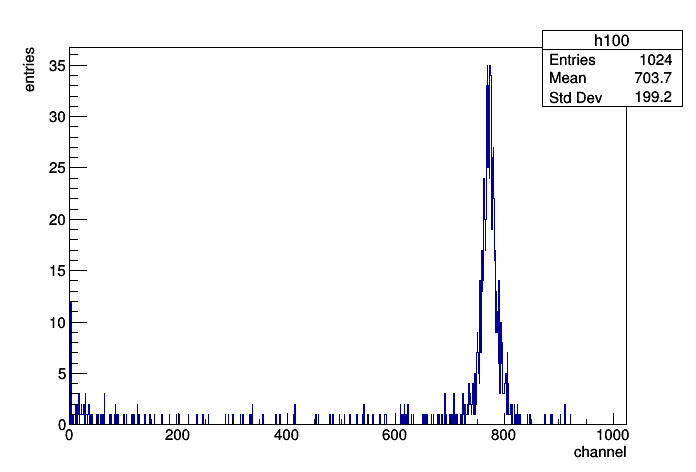

In [4]:
auto h = importHist("test.dat");
c = new TCanvas();
h->Draw();
c->Draw();

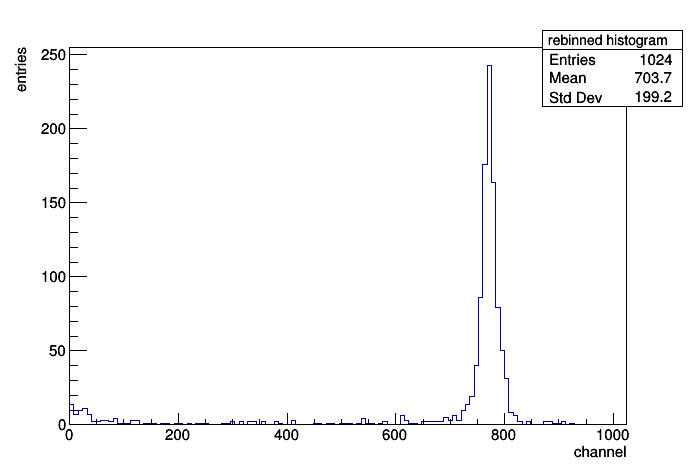

In [5]:
auto hRebin = rebin(h,8,"rebinned histogram");
hRebin->Draw();
c->Draw();